In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2

In [2]:
df = pd.read_csv("/content/restaurant_customer_satisfaction.csv")
df.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


In [4]:
# Categorical columns
categorical_cols = ['Gender', 'VisitFrequency', 'PreferredCuisine']
label_encoders = {}

In [5]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

In [6]:
# Selected features and target
selected_columns = ['Age', 'Gender', 'Income', 'VisitFrequency', 'AverageSpend',
                    'PreferredCuisine', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']

X = df[selected_columns]
y = df['HighSatisfaction']

In [7]:
# Numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# The neural network (My Intro To ML Instance 5 architecture)
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5323 - loss: 1.6632 - val_accuracy: 0.7300 - val_loss: 1.4117
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5936 - loss: 1.4555 - val_accuracy: 0.7467 - val_loss: 1.3584
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6359 - loss: 1.3326 - val_accuracy: 0.8067 - val_loss: 1.2782
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6834 - loss: 1.2389 - val_accuracy: 0.8300 - val_loss: 1.1970
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7431 - loss: 1.1490 - val_accuracy: 0.8633 - val_loss: 1.1090
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7685 - loss: 1.0826 - val_accuracy: 0.8667 - val_loss: 1.0295
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8193 - loss: 0.9914 - val_accuracy: 0.8700 - val_loss: 0.9606
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8215 - loss: 0.9452 - val_accuracy: 0.8633 - val_loss

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8360 - loss: 0.4952 


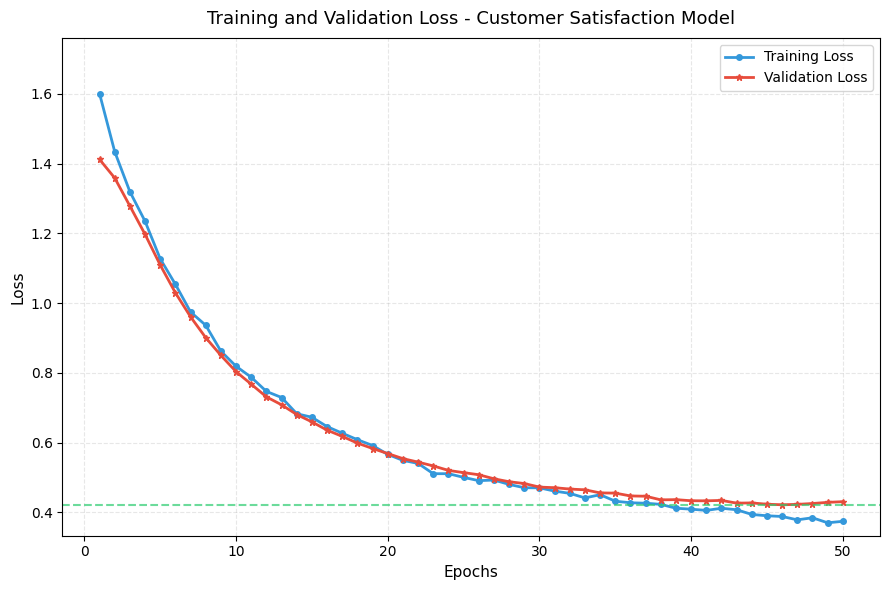

In [12]:
import matplotlib.pyplot as plt

# Function to plot loss curves
def loss_curve_plot(epochs, loss, val_loss, instance_name):

    plt.figure(figsize=(9, 6))
    plt.plot(epochs, loss, 'o-', color='#3498db', linewidth=2, markersize=4, label='Training Loss')
    plt.plot(epochs, val_loss, '*-', color='#e74c3c', linewidth=2, markersize=5, label='Validation Loss')
    min_val_loss = min(val_loss)
    plt.axhline(y=min_val_loss, color='#2ecc71', linestyle='--', alpha=0.7)

    plt.title(f'Training and Validation Loss - {instance_name}', fontsize=13, pad=10)
    plt.xlabel('Epochs', fontsize=11)
    plt.ylabel('Loss', fontsize=11)
    plt.legend(frameon=True, fancybox=True)
    plt.grid(alpha=0.3, linestyle='--')

    plt.ylim(min(min(loss), min(val_loss))*0.9, max(max(loss), max(val_loss))*1.1)

    plt.tight_layout()
    plt.show()

# Extract loss values from training history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
loss_curve_plot(epochs, loss, val_loss, "Customer Satisfaction Model")


In [13]:
model.save("trained_customer_satisfaction_model.keras")

In [24]:
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8633333444595337


In [33]:
import requests
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler

model_path = "trained_customer_satisfaction_model.keras"
nn_model = tf.keras.models.load_model(model_path)

# 2 base endpoints
customer_url = "https://db-design-formative.onrender.com/api/customers/"
visit_url = "https://db-design-formative.onrender.com/api/visits/"

# adding new entrie to the database. it will be futher be use to
# determined or predict tha satisfaction.

customer_data = {
    "age": 24,
    "gender": 1,
    "income": "23432.00"

}

visit_data = {
    "visit_frequency": "Weekly",
    "average_spend": "27.83",
    "preferred_cuisine": "Chinese",
    "wait_time": 45,
    "service_rating": 1,
    "food_rating": 1,
    "ambiance_rating": 3
}

# sending post request

customer_res = requests.post(url=customer_url, json=customer_data)

if customer_res.status_code == 201:
  # retrive the customer_id
  customer_id = customer_res.json().get("customer_id")
  visit_data["customer"] = customer_id
else:
  raise Exception("there was and error while creating new customer in the database")

visit_res = requests.post(url=visit_url, json=visit_data)


if visit_res.status_code == 201:
  pass
else:
  print(customer_res.json())
  print(visit_res.status_code)
  print(visit_data)
  raise Exception("there was and error while creating new visit in the database")




In [58]:
from collections.abc import Hashable
## make satisfaction prediction base on the new entries

new_customer_data = customer_res.json()
new_visit_data = visit_res.json()

#process the data and make prediction
# remove the custome_id, visit_id and customer from data

new_customer_id = new_customer_data.pop("customer_id")

# customer_id from new_visit_data, (must be the same as that from new_customer_data)

customer_id = new_visit_data.pop("customer")
visit_id = new_visit_data.pop("visit_id")

if int(new_customer_id) != int(customer_id):
  raise Exception("data from different customer trying to be use to make prediction")

# at this point all tests passed so proceding to make prediction

['Age', 'Gender', 'Income', 'VisitFrequency', 'AverageSpend',
                    'PreferredCuisine', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']


age = new_customer_data.get("age")
income = float(new_customer_data.get("income"))
gender = new_customer_data.get("gender")
visit_frequency = visit_data.get("visit_frequency")
average_spend = visit_data.get("average_spend")
preferred_cuisine = visit_data.get("preferred_cuisine")
wait_time = visit_data.get("wait_time")
service_rating = visit_data.get("service_rating")
food_rating = visit_data.get("food_rating")
ambiance_rating = visit_data.get("ambiance_rating")

#convert back the gender

gender = "Male" if gender == 0 else "Female"



data = [
    age,
    gender,
    income,
    visit_frequency,
    average_spend,
    preferred_cuisine,
    wait_time,
    service_rating,
    food_rating,
    ambiance_rating
]


latest_data = pd.DataFrame(data, index=selected_columns).T
latest_data.head()

# replace Gender with 2 because it it stored in the df as 2

categorical_cols = ["Gender" , 'VisitFrequency', 'PreferredCuisine']

print(label_encoders)
print(latest_data)
print(latest_data.columns)


for col in categorical_cols:
    print(col)
    print(isinstance(col, Hashable))
    latest_data[col] = label_encoders[col].transform(latest_data[col])

# scaler = joblib.load("scaler.pkl")

feature_columns = ['Age', 'Gender', 'Income', 'VisitFrequency', 'AverageSpend',
                    'PreferredCuisine', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']


latest_scaled = scaler.transform(latest_data[feature_columns])
latest_scaled_df = pd.DataFrame(latest_scaled, columns=feature_columns)
prediction = nn_model.predict(latest_scaled_df)
predicted_label = (prediction > 0.5).astype(int)[0][0]  # Convert to binary (0 or 1)


# posting the new satisfaction in the db
# endpoint

satisfaction_url = "https://db-design-formative.onrender.com/api/satisfactions/"

satisfaction_data = {
    "customer": customer_id,
    "visit": visit_id,
    "satisfaction": bool(predicted_label)
}


satisfaction_res = requests.post(url=satisfaction_url, json=satisfaction_data)

if satisfaction_res.status_code == 201:
  print("new entry add successfully")
  print(satisfaction_res.json())
else:
  print("there was an error while adding new entry")
  print(satisfaction_res.status_code)


{'Gender': LabelEncoder(), 'VisitFrequency': LabelEncoder(), 'PreferredCuisine': LabelEncoder(), 'TimeOfVisit': LabelEncoder(), 'DiningOccasion': LabelEncoder(), 'MealType': LabelEncoder()}
  Age  Gender   Income VisitFrequency AverageSpend PreferredCuisine WaitTime  \
0  24  Female  23432.0         Weekly        27.83          Chinese       45   

  ServiceRating FoodRating AmbianceRating  
0             1          1              3  
Index(['Age', 'Gender', 'Income', 'VisitFrequency', 'AverageSpend',
       'PreferredCuisine', 'WaitTime', 'ServiceRating', 'FoodRating',
       'AmbianceRating'],
      dtype='object')
Gender
True
VisitFrequency
True
PreferredCuisine
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
########################################
False
{'customer': '2156', 'visit': '1502', 'satisfaction': False}
new entry add successfully
{'satisfaction_id': '103', 'satisfaction': False, 'recorded_at': '2025-03-13T17:03:12.391597Z', 'customer': '2156', 'visit': 1502}
